# Brand Analysis on Sephora Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the data

In [5]:
df = pd.read_csv('product_info.csv')

In [7]:
pd.set_option('display.max_columns', None) # So we can see the entire data when there are too many columns

In [9]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


# Know your data

In [12]:
df.info() # the data has 8494 rows and 27 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

# Checking for Null Values

In [15]:
df.isnull().sum().sort_values(ascending=False) # the columns variation_desc,value_price_usd,sale_price_usd,variation_value,variation_type,child_max_price,child_min_price,tertiary_category,size,child_count has highest misiing values.Those columns are dropped as they are not needed for the analysis

sale_price_usd        8224
value_price_usd       8043
variation_desc        7244
child_max_price       5740
child_min_price       5740
highlights            2207
size                  1631
variation_value       1598
variation_type        1444
tertiary_category      990
ingredients            945
rating                 278
reviews                278
secondary_category       8
sephora_exclusive        0
brand_id                 0
child_count              0
primary_category         0
new                      0
out_of_stock             0
online_only              0
limited_edition          0
brand_name               0
product_name             0
price_usd                0
loves_count              0
product_id               0
dtype: int64

# Drop Columns with too many null values

In [18]:
df.drop(columns = ["variation_desc", "value_price_usd", "sale_price_usd", "variation_value","variation_type","child_max_price", "child_min_price", "tertiary_category", "size", "child_count"], axis = 1, inplace = True)

# Rating,Reviews,Ingredients,Highlights,Secondary_category still have missing values

In [21]:
df["reviews"].fillna(0, inplace=True)
df["rating"].fillna(0, inplace=True)
df["ingredients"].fillna("unknown", inplace=True)
df["highlights"].fillna("unknown", inplace=True)
df["secondary_category"].fillna("unknown", inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8494 non-null   float64
 6   reviews             8494 non-null   float64
 7   ingredients         8494 non-null   object 
 8   price_usd           8494 non-null   float64
 9   limited_edition     8494 non-null   int64  
 10  new                 8494 non-null   int64  
 11  online_only         8494 non-null   int64  
 12  out_of_stock        8494 non-null   int64  
 13  sephora_exclusive   8494 non-null   int64  
 14  highlights          8494 non-null   object 
 15  primary_category    8494 non-null   object 
 16  second

# Analysing Boolean Variables

### There are 6121 products which are not sephora exclusisve and 2373 which are sephora exclusive

In [27]:
df['sephora_exclusive'].value_counts() 

0    6121
1    2373
Name: sephora_exclusive, dtype: int64

In [29]:
df['out_of_stock'].value_counts() #626 of their products are out of stock 

0    7868
1     626
Name: out_of_stock, dtype: int64

### 1861 of the available products are online only

In [32]:
df['online_only'].value_counts() #1861 of the available products are available online only

0    6633
1    1861
Name: online_only, dtype: int64

In [34]:
df['new'].value_counts()

0    7885
1     609
Name: new, dtype: int64

### 597 of the products are limited edition

In [37]:
df['limited_edition'].value_counts() 

0    7897
1     597
Name: limited_edition, dtype: int64

# Descritive Statistics for the numerical columns that we are interested in 
### Mean and Median for the columns loves_count,reviews and price_usd seems far apart so further investigation is needed for outliers. 


In [40]:
# Select specific columns
selected_columns = ['loves_count', 'rating','reviews','price_usd']

# Use describe on selected columns
df[selected_columns].describe().style.format("{:.2f}")


,loves_count,rating,reviews,price_usd
count,8494.00,8494.00,8494.00,8494.00
mean,29179.57,4.06,433.87,51.66
std,66092.12,0.90,1086.73,53.67
min,0.00,0.00,0.00,3.00
25%,3758.00,3.93,22.00,25.00
50%,9880.00,4.27,112.00,35.00
75%,26841.25,4.52,402.00,58.00
max,1401068.00,5.00,21281.00,1900.00


# Stats for Non Numeric Columns


In [43]:
'''
this command in pandas provides a summary of statistics for columns in a DataFrame that are of type object, 
which typically includes string data. This command can be very useful for understanding 
the distribution and properties of categorical data within your DataFrame.

'''
df.describe(include = ["object"])


,product_id,product_name,brand_name,ingredients,highlights,primary_category,secondary_category
count,8494,8494,8494,8494,8494,8494,8494
unique,8494,8415,304,6539,4418,9,42
top,P473671,Fragrance Discovery Set,SEPHORA COLLECTION,unknown,unknown,Skincare,Women
freq,1,3,352,945,2207,2420,875


In [45]:
# The top product is Fragrance Discovery Set from the brand SEPHORA COLLECTION

# Univariate Analysis

# For Columns loves_count, Reviews, Price

In [50]:
# During the decriptive stats analysis, the mean is greater than meidan, so checking for a right tailed distribution 

In [52]:
# Box Plots for loves_count, Reviews, Price with outliers

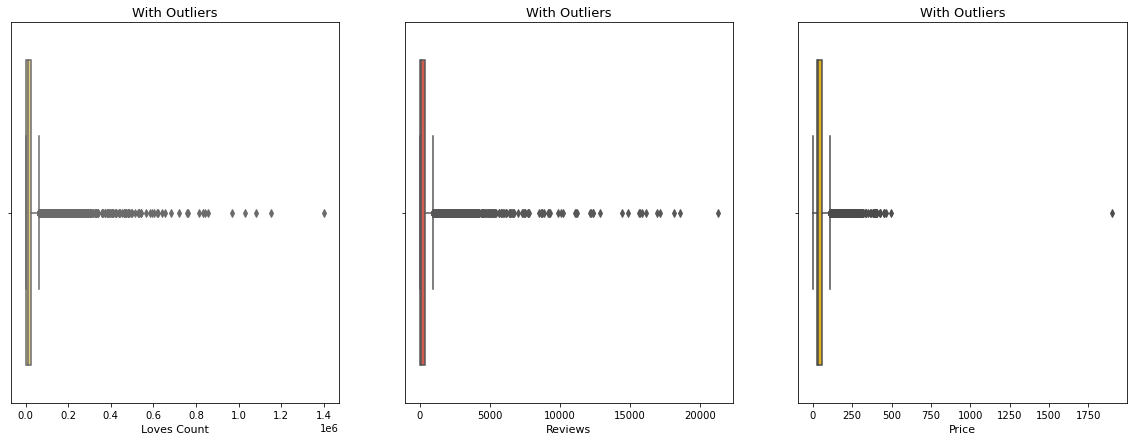

In [54]:
fig, axes = plt.subplots(1,3,figsize=(20,7))

sns.boxplot(x=df['loves_count'], ax=axes[0],color='#F7DC6F')
axes[0].set_title('With Outliers',fontsize = 13)
axes[0].set_xlabel("Loves Count",fontsize = 11);

sns.boxplot(x=df['reviews'], ax=axes[1],color='#E74C3C')
axes[1].set_title('With Outliers',fontsize = 13)
axes[1].set_xlabel("Reviews",fontsize = 11);

sns.boxplot(x=df['price_usd'], ax=axes[2], color = '#FFC300')
axes[2].set_title('With Outliers',fontsize = 13)
axes[2].set_xlabel("Price",fontsize = 11);

In [56]:
# Visulaizing Loves_count, Reviews, Price with outliers

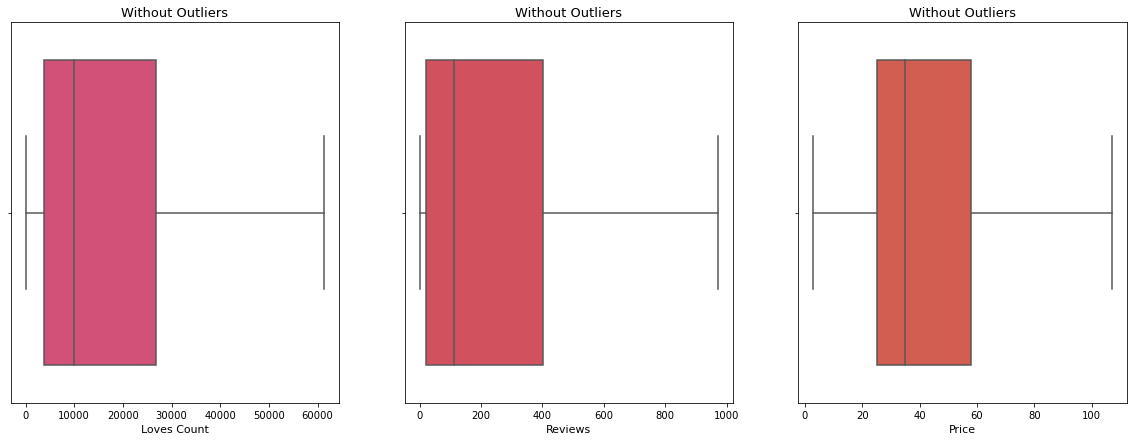

In [58]:
fig, axes = plt.subplots(1,3,figsize=(20,7))

sns.boxplot(x=df['loves_count'],ax=axes[0],showfliers=False,color='#e73c70')
axes[0].set_title('Without Outliers',fontsize = 13)
axes[0].set_xlabel('Loves Count',fontsize = 11);

sns.boxplot(x=df['reviews'],ax=axes[1],showfliers=False, color='#e73c4e')
axes[1].set_title('Without Outliers',fontsize = 13)
axes[1].set_xlabel('Reviews',fontsize = 11);

sns.boxplot(x=df['price_usd'],ax=axes[2],showfliers=False ,color = '#e74c3c')#'#FFC3CB')#'#FF91A4')
axes[2].set_title('Without Outliers',fontsize = 13)
axes[2].set_xlabel('Price',fontsize = 11);

# Bivariate Analysis

In [61]:
# Looking for correlation between the variables

In [63]:
df.corr()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive
brand_id,1.000000,-0.035604,-0.033878,-0.069571,-0.066667,0.004533,0.027141,0.107290,-0.081976,0.124417
loves_count,-0.035604,1.000000,0.088813,0.685609,-0.089607,-0.069116,-0.076058,-0.163905,-0.053776,0.040512
rating,-0.033878,0.088813,1.000000,0.099885,-0.004534,-0.175204,-0.166838,-0.115258,-0.064395,0.028393
reviews,-0.069571,0.685609,0.099885,1.000000,-0.057158,-0.088411,-0.068654,-0.145589,-0.065314,-0.023933
price_usd,-0.066667,-0.089607,-0.004534,-0.057158,1.000000,0.046343,0.028793,0.091808,-0.022198,-0.140527
limited_edition,0.004533,-0.069116,-0.175204,-0.088411,0.046343,1.000000,0.155662,0.061462,0.162170,0.066938
new,0.027141,-0.076058,-0.166838,-0.068654,0.028793,0.155662,1.000000,0.042553,0.014177,0.066984
online_only,0.107290,-0.163905,-0.115258,-0.145589,0.091808,0.061462,0.042553,1.000000,0.002011,-0.100806
out_of_stock,-0.081976,-0.053776,-0.064395,-0.065314,-0.022198,0.162170,0.014177,0.002011,1.000000,0.025218
sephora_exclusive,0.124417,0.040512,0.028393,-0.023933,-0.140527,0.066938,0.066984,-0.100806,0.025218,1.000000


# Visualizing using a heat map
#### We see a strong positive correlation between loves_count and reviews

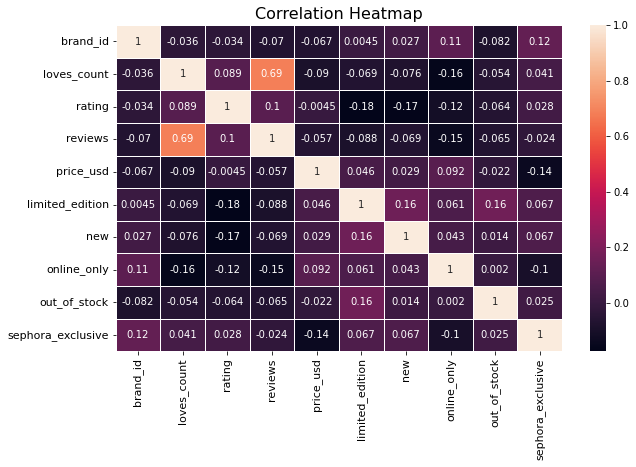

In [66]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()



# Lets look to find some more insights on the products

### What is the product with highest loves count and what is the price of it ?

In [71]:
max_loves_count_row = df.loc[df['loves_count'].idxmax()]

brand_name = max_loves_count_row['brand_name']
product_name = max_loves_count_row['product_name']
price = max_loves_count_row['price_usd']

In [73]:
print(f"Product which is most loved by the customers is {product_name} from the brand {brand_name} with price {price}")

Product which is most loved by the customers is Soft Pinch Liquid Blush from the brand Rare Beauty by Selena Gomez with price 23.0


### What is the product that has least loves_count and what is the price of it?

In [76]:
min_loves_count_row = df.loc[df['loves_count'].idxmin()]

min_lov_brand_name = min_loves_count_row['brand_name']
min_lov_product_name = min_loves_count_row['product_name']
min_lov_price = min_loves_count_row['price_usd']

In [78]:
print(f"Product with least loves is {min_lov_product_name} from the brand {min_lov_brand_name} with price {min_lov_price}")

Product with least loves is Mini Baomint Moisturizing Curl Defining Gel from the brand adwoa beauty with price 14.0


### Which is the most loved category - Make up is the most loved category

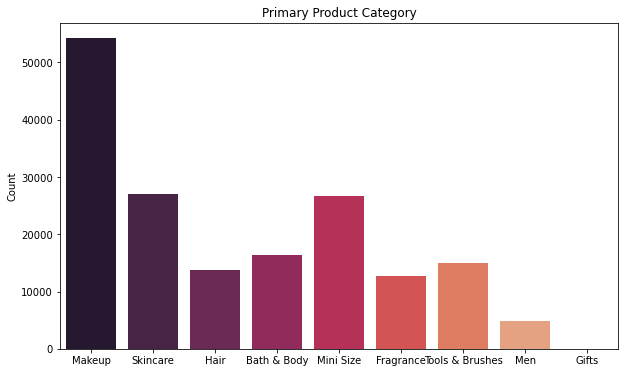

In [82]:
df_sorted = df.sort_values(by='loves_count', ascending=False)

plt.figure(figsize = (10, 6))
sns.barplot(x=df_sorted["primary_category"], y=df_sorted["loves_count"],ci=None,palette = "rocket")
plt.title('Primary Product Category')
plt.xlabel('')
plt.ylabel('Count')
plt.show()



# Make up

In [85]:
makeup_df = df[df['primary_category'] == 'Makeup']

### Which Category is most loved within makeup - Top 4 categories are Face, Eye, Lip and Cheek

In [88]:
loves_count_by_secondary_makeup = makeup_df.groupby("secondary_category")["loves_count"].sum().reset_index()
top_15_liked_makeup = loves_count_by_secondary_makeup.sort_values(by="loves_count", ascending=False).head(15)
top_15_liked_makeup.reset_index().drop(columns=['index'])

,secondary_category,loves_count
0,Face,41939438
1,Eye,33496199
2,Lip,28942207
3,Cheek,12734224
4,Brushes & Applicators,5991365
5,Mini Size,2203732
6,Makeup Palettes,1041659
7,Accessories,907218
8,Nail,746181
9,Value & Gift Sets,481663


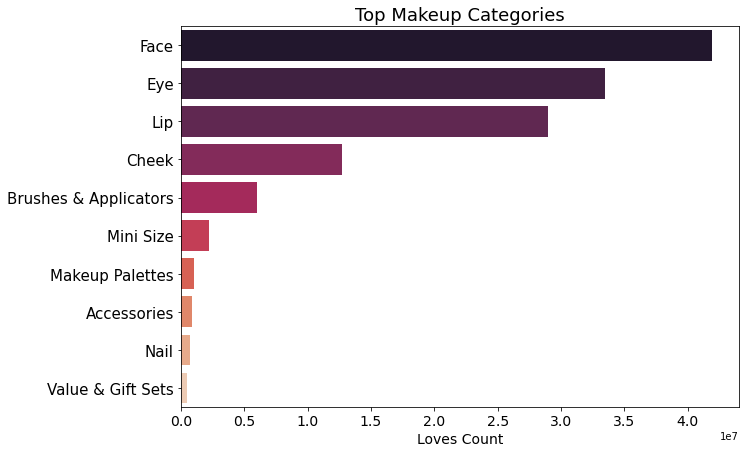

In [90]:
plt.figure(figsize=(10,7))
sns.barplot(x='loves_count', y='secondary_category', data=top_15_liked_makeup,palette = "rocket")
plt.xlabel("Loves Count", fontsize=14)
plt.ylabel("")
plt.title("Top Makeup Categories", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()


### Top three products in Face are Radiant Creamy Concealer by NARS,Pro Filt’r Soft Matte Longwear Liquid Foundation by Fenty Beauty by Rihanna and Translucent Loose Setting Powder by Laura Mercier 

In [93]:
Face_df = df[df['secondary_category'] == 'Face']
Face_df[Face_df['secondary_category']=='Face'].sort_values(by="loves_count", ascending=False).head(3)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
5249,P377873,Radiant Creamy Concealer,3976,NARS,1153594,4.3080,12887.0,"['Water/Aqua/Eau, Dimethicone, Hydrogenated Po...",32.0,0,0,0,0,0,"['Radiant Finish', 'Hydrating', 'Good for: Dar...",Makeup,Face
2524,P87985432,Pro Filt’r Soft Matte Longwear Liquid Foundation,6200,Fenty Beauty by Rihanna,856497,4.0356,16935.0,"['Aqua/Water/Eau, Dimethicone, Talc, PEG-10 Di...",40.0,0,0,0,0,0,"['Long-wearing', 'Full Coverage', 'Best for Oi...",Makeup,Face
4458,P109908,Translucent Loose Setting Powder,5809,Laura Mercier,813497,4.5029,9335.0,"['Talc, Magnesium Myristate, Nylon-12, Capryli...",43.0,0,0,0,0,0,"['Loose Powder Formula', 'Community Favorite',...",Makeup,Face


### Top 3 Eye Products are Brow Wiz Ultra-Slim Precision Brow Pencil,DIPBROW Waterproof, Smudge Proof Brow Pomade,Eye Shadow Singles by Anastasia Beverly Hills 

In [96]:
Eye_df = df[df['secondary_category'] == 'Eye']
Eye_df[Eye_df['secondary_category']=='Eye'].sort_values(by="loves_count", ascending=False).head(3)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
247,P202633,Brow Wiz Ultra-Slim Precision Brow Pencil,5746,Anastasia Beverly Hills,834189,4.4056,15885.0,unknown,25.0,0,0,0,0,0,"['Vegan', 'Natural Finish', 'Community Favorite']",Makeup,Eye
248,P384060,"DIPBROW Waterproof, Smudge Proof Brow Pomade",5746,Anastasia Beverly Hills,617437,4.6701,11158.0,"['Cyclopentasiloxane, Isododecane, Cyclohexasi...",21.0,0,0,0,0,0,"['Vegan', 'Cream Formula', 'Community Favorite...",Makeup,Eye
249,P404832,Eye Shadow Singles,5746,Anastasia Beverly Hills,605038,4.4696,790.0,"['Mica, Dimethicone, Boron Nitride, Nylon-12, ...",12.0,0,0,0,0,0,unknown,Makeup,Eye


### Top 3 lip products are Cream Lip Stain Liquid Lipstick by SEPHORA COLLECTION,Gloss Bomb Universal Lip Luminizer by Fenty Beauty by Rihanna and Dior Addict Lip Glow by Dior 

In [99]:
Lip_df = df[df['secondary_category'] == 'Lip']
Lip_df[Lip_df['secondary_category']=='Lip'].sort_values(by="loves_count", ascending=False).head(3)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
6434,P281411,Cream Lip Stain Liquid Lipstick,3902,SEPHORA COLLECTION,1029051,4.3201,11111.0,"['Isododecane, Ci 15850 (Red 7 Lake), Dimethic...",15.0,0,0,0,0,1,"['Liquid Formula', 'Community Favorite', 'Long...",Makeup,Lip
2523,P67988453,Gloss Bomb Universal Lip Luminizer,6200,Fenty Beauty by Rihanna,968317,4.6357,12136.0,"['Polybutene, Octyldodecanol, Bis-Diglyceryl P...",21.0,0,0,0,0,0,"['Vegan', 'Community Favorite', 'Shimmer Finish']",Makeup,Lip
1893,P236816,Dior Addict Lip Glow,1073,Dior,757716,4.3517,2084.0,unknown,40.0,1,1,1,0,1,"['Satin Finish', 'Hydrating', 'Without Formald...",Makeup,Lip


### Top 3 cheek products are Soft Pinch Liquid Blush by Rare Beauty, Nars blush and Hoola Bronzer by Benefit Cosmetics

In [102]:
cheek_df = df[df['secondary_category'] == 'Cheek']
cheek_df[cheek_df['secondary_category']=='Cheek'].sort_values(by="loves_count", ascending=False).head(3)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
6242,P97989778,Soft Pinch Liquid Blush,6317,Rare Beauty by Selena Gomez,1401068,4.5356,4733.0,"['Hydrogenated Polyisobutene, Hydrogenated Pol...",23.0,0,0,0,0,1,"['Radiant Finish', 'Liquid Formula', 'Communit...",Makeup,Cheek
5250,P2855,Blush,3976,NARS,840076,4.6643,18127.0,"['Isododecane, Talc, Dimethicone, Caprylic/Cap...",32.0,0,0,0,0,0,unknown,Makeup,Cheek
525,P290636,Hoola Bronzer,5333,Benefit Cosmetics,380654,4.4756,3278.0,"['Talc, Iron Oxides (Ci77491, Ci77492, Ci77499...",35.0,0,0,0,0,0,"['allure 2020 Best of Beauty Award Winner', 'P...",Makeup,Cheek


# Which makeup brand is the most loved 
### SEPHORA COLLECTION is the most loved

In [105]:
loves_count_by_brand = makeup_df.groupby("brand_name")["loves_count"].sum().reset_index()
top_15_liked_brands = loves_count_by_brand.sort_values(by="loves_count", ascending=False).head(15)
top_15_liked_brands.reset_index().drop(columns=['index'])

,brand_name,loves_count
0,SEPHORA COLLECTION,9711357
1,Fenty Beauty by Rihanna,8990669
2,Anastasia Beverly Hills,7780799
3,Charlotte Tilbury,6926367
4,NARS,6691517
5,Rare Beauty by Selena Gomez,5496073
6,Urban Decay,5087273
7,Dior,5015866
8,Too Faced,4460063
9,tarte,4252790


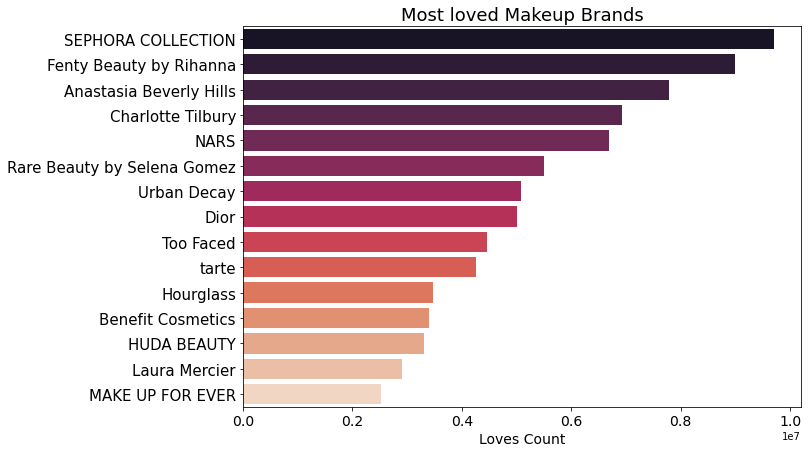

In [107]:
average_likes_count_by_brand = makeup_df.groupby("brand_name")["loves_count"].sum().reset_index()
top_15_avg_liked_brands = average_likes_count_by_brand.sort_values(by="loves_count", ascending=False).head(15)

plt.figure(figsize=(10,7))
sns.barplot(data=top_15_avg_liked_brands, x="loves_count", y="brand_name", palette = "rocket")
plt.xlabel("Loves Count", fontsize=14)
plt.ylabel("")
plt.title("Most loved Makeup Brands", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Top 2 products from the Sephora Collection are Cream Lip Stain Liquid Lipstick and Sephora Colorful Eyeshadow

In [110]:
sephora_col_df = df[df['brand_name'] == 'SEPHORA COLLECTION']
sephora_col_df[sephora_col_df['primary_category']=='Makeup'].sort_values(by="loves_count", ascending=False).head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
6434,P281411,Cream Lip Stain Liquid Lipstick,3902,SEPHORA COLLECTION,1029051,4.3201,11111.0,"['Isododecane, Ci 15850 (Red 7 Lake), Dimethic...",15.0,0,0,0,0,1,"['Liquid Formula', 'Community Favorite', 'Long...",Makeup,Lip
6435,P430932,Sephora Colorful Eyeshadow,3902,SEPHORA COLLECTION,437510,3.7494,1656.0,"['Mica, Talc, CI 77891 (Titanium Dioxide), Cal...",10.0,0,0,0,0,1,"['Pressed Powder Formula', 'Matte Finish', 'Sh...",Makeup,Eye


# Skincare

In [113]:
skincare_df = df[df['primary_category'] == 'Skincare']

In [115]:
skincare_df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,0,0,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,67870,4.0259,1159.0,"['Collagen (Vegan)*, Water (Aqua, Eau), Propan...",115.0,0,0,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Treatments
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,17890,4.5306,1142.0,"['Aqua (Water/Eau), Stearic Acid, Isopropyl Is...",68.0,0,0,0,0,1,unknown,Skincare,Eye Care
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,44448,3.8721,649.0,"['Collagen (Vegan)*, Water (Aqua, Eau), Glycer...",29.0,0,0,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Plump...",Skincare,Lip Balms & Treatments
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,6018,Algenist,27278,4.4134,508.0,"['Octinoxate 7.5%, Titanium Dioxide 2%, Zinc O...",28.0,0,0,0,0,0,"['Vegan', 'Hypoallergenic', 'UV Protection', '...",Skincare,Sunscreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,6169,Youth To The People,8989,4.8750,8.0,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",340.0,1,0,1,0,1,"['Clean at Sephora', 'Hydrating', 'Good for: A...",Skincare,Value & Gift Sets
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",6169,Youth To The People,10406,4.1667,6.0,"['Triple Peptide + Cactus Oasis Serum:', 'Wate...",28.0,0,0,0,0,0,"['Vegan', 'Hyaluronic Acid', 'Clean at Sephora...",Skincare,Value & Gift Sets
8426,P503872,Mini Mandelic Acid + Superfood Unity Exfoliant,6169,Youth To The People,6510,4.8000,5.0,"['Water/Aqua/Eau (Aqua), Helianthus Annuus (Su...",16.0,0,0,0,0,0,"['Clean + Planet Positive', 'Good for: Pores',...",Skincare,Cleansers
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169,Youth To The People,13592,4.2500,4.0,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",20.0,1,0,0,0,0,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Skincare,Value & Gift Sets


### Top 3 categories that are most loved are Treatments,Moisturizers and Cleansers

In [118]:
loves_count_by_secondary_skin = skincare_df.groupby("secondary_category")["loves_count"].sum().reset_index()
top_15_liked_skin = loves_count_by_secondary_skin.sort_values(by="loves_count", ascending=False).head(15)
top_15_liked_skin.reset_index().drop(columns=['index'])

,secondary_category,loves_count
0,Treatments,16993912
1,Moisturizers,14227973
2,Cleansers,10502846
3,Masks,5373402
4,Eye Care,4445469
5,Lip Balms & Treatments,4218715
6,Mini Size,2431490
7,Sunscreen,2415779
8,Value & Gift Sets,2151393
9,Wellness,1028565


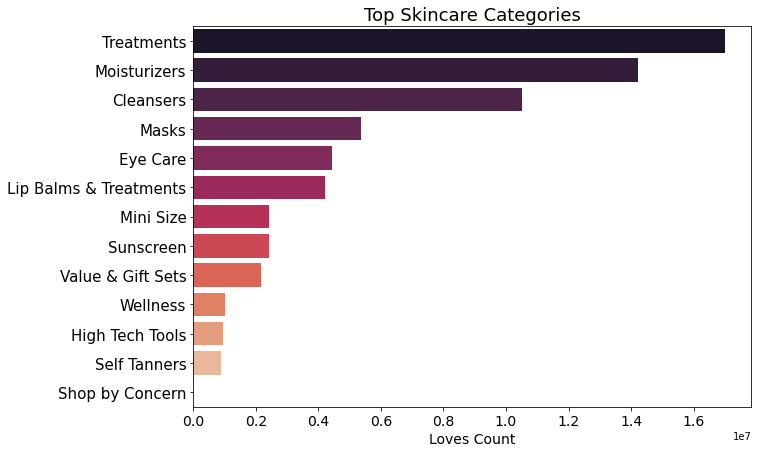

In [120]:
plt.figure(figsize=(10,7))
sns.barplot(y='secondary_category', x='loves_count', data=top_15_liked_skin,palette = "rocket")
plt.xlabel("Loves Count", fontsize=14)
plt.ylabel("")
plt.title("Top Skincare Categories", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()


### Top 3 most loved skincare brands are The Ordinary,Drunk Elephant and Tatcha

In [123]:
likes_count_by_brand_skin = skincare_df.groupby("brand_name")["loves_count"].sum().reset_index()
top_15_liked_brands_skin = likes_count_by_brand_skin.sort_values(by="loves_count", ascending=False).head(15)
top_15_liked_brands_skin.reset_index().drop(columns=['index'])

,brand_name,loves_count
0,The Ordinary,6628060
1,Drunk Elephant,3615978
2,Tatcha,3248121
3,Glow Recipe,2668539
4,LANEIGE,2445502
5,The INKEY List,2201657
6,SEPHORA COLLECTION,2155630
7,fresh,2127726
8,Youth To The People,1908215
9,CLINIQUE,1701952


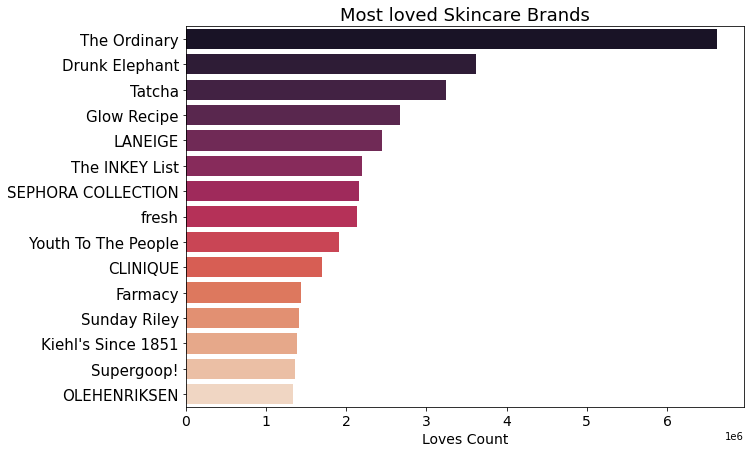

In [125]:
plt.figure(figsize=(10, 7))
sns.barplot(data=top_15_liked_brands_skin, x="loves_count", y="brand_name",palette = "rocket")
plt.xlabel("Loves Count", fontsize=14)
plt.ylabel("")
plt.title("Most loved Skincare Brands", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Niacinamide serum from The Ordinary and Protini Polypeptide Firming Refillable Moisturizer from Drunk Elephant are the popular skincare products

In [128]:
ordinary_df_skin = df[df['brand_name'] == 'The Ordinary']
ordinary_df_skin[ordinary_df_skin['primary_category']=='Skincare'].sort_values(by="loves_count", ascending=False).head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
7648,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,6234,The Ordinary,763168,4.2439,5778.0,"['Aqua (Water), Niacinamide, Pentylene Glycol,...",6.0,0,0,0,0,0,"['Vegan', 'Community Favorite', 'Oil Free', 'W...",Skincare,Treatments
7651,P427419,Hyaluronic Acid 2% + B5 Hydrating Serum,6234,The Ordinary,720504,4.2133,3788.0,"['Water, Sodium Hyaluronate, Pentylene Glycol,...",15.7,0,0,0,0,1,"['Vegan', 'Hyaluronic Acid', 'allure 2019 Best...",Skincare,Treatments


In [130]:
Drunk_Elephant_df = df[df['brand_name'] == 'Drunk Elephant']
Drunk_Elephant_df[Drunk_Elephant_df['primary_category']=='Skincare'].sort_values(by="loves_count", ascending=False).head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
2228,P427421,Protini Polypeptide Firming Refillable Moistur...,7083,Drunk Elephant,411372,3.962,6048.0,"['Water/Aqua/Eau, Dicaprylyl Carbonate, Glycer...",68.0,0,0,0,0,0,"['Refill Available', 'Good for: Dullness/Uneve...",Skincare,Moisturizers
2233,P432668,D-Bronzi Anti-Pollution Bronzing Drops with Pe...,7083,Drunk Elephant,328059,4.433,2037.0,"['Water, Hydrogenated Polyisobutene, Glyceryl ...",38.0,0,0,0,1,0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments


# Fragrance Analysis

In [133]:
Fragrance_df = df[df['primary_category'] == 'Fragrance']

In [135]:
Fragrance_df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,P501330,Black Opium Gift Set,1070,Yves Saint Laurent,3086,3.5000,2.0,"['The Slim Velvet Radical:', 'Dimethicone, Bis...",150.0,1,0,0,1,0,unknown,Fragrance,Value & Gift Sets
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,"['Libre Eau de Parfum:', 'Alcohol, Parfum/Frag...",148.0,1,1,1,1,0,unknown,Fragrance,Value & Gift Sets
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,"['Alcohol, Aqua / Water / Eau, Parfum / Fragra...",106.0,0,0,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,"['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...",134.0,1,1,1,1,0,unknown,Fragrance,Value & Gift Sets


### Top 3 categories in Fragrance are Women,Value & Gift Sets and Men

In [138]:
loves_count_by_secondary_fragrance = Fragrance_df.groupby("secondary_category")["loves_count"].sum().reset_index()
top_liked_fragrance = loves_count_by_secondary_fragrance.sort_values(by="loves_count", ascending=False).head(15)
top_liked_fragrance.reset_index().drop(columns=['index'])

,secondary_category,loves_count
0,Women,14719234
1,Value & Gift Sets,1764401
2,Men,1024217
3,Candles & Home Scents,716116
4,unknown,32211
5,Mini Size,12857


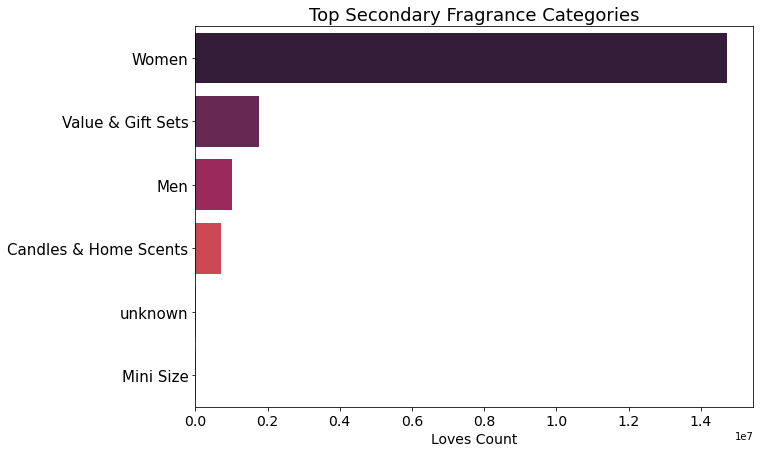

In [140]:
plt.figure(figsize=(10, 7))
sns.barplot(y='secondary_category', x='loves_count', data=top_liked_fragrance,palette = "rocket")
plt.xlabel("Loves Count", fontsize=14)
plt.ylabel("")
plt.title("Top Secondary Fragrance Categories", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Top 3 brands are CHANEL,TOM FORD, Yves Saint Laurent

In [143]:
loves_count_by_brand_frag = Fragrance_df.groupby("brand_name")["loves_count"].sum().reset_index()
top_liked_brands_frag = loves_count_by_brand_frag.sort_values(by="loves_count", ascending=False).head(15)
top_liked_brands_frag.reset_index().drop(columns=['index'])

,brand_name,loves_count
0,CHANEL,1243539
1,TOM FORD,1084950
2,Yves Saint Laurent,1022219
3,Maison Margiela,999206
4,Dior,897569
5,Versace,728783
6,Jo Malone London,720303
7,Sol de Janeiro,707087
8,KAYALI,689347
9,Marc Jacobs Fragrances,631698


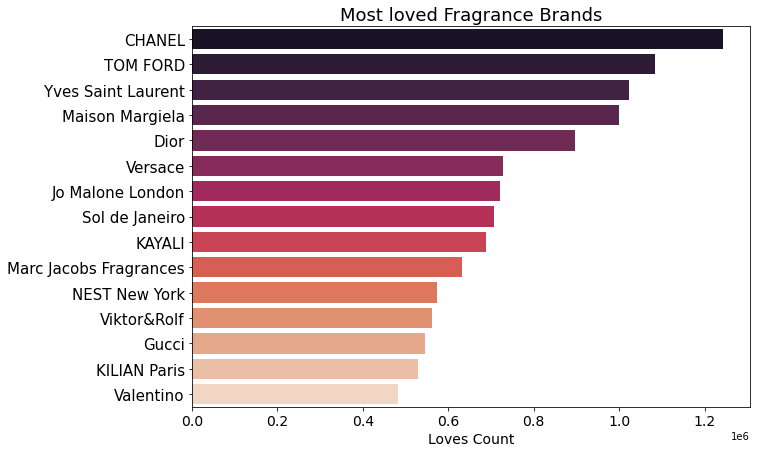

In [145]:
plt.figure(figsize=(10, 7))
sns.barplot(data=top_liked_brands_frag, x="loves_count", y="brand_name",palette = "rocket")
plt.xlabel("Loves Count", fontsize=14)
plt.ylabel("")
plt.title("Most loved Fragrance Brands", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

### Top 3 perfumes are COCO MADEMOISELLE Eau de Parfum by Chanel, Lost Cherry by Tom Ford and Black Opium Eau de Parfum by YSL

In [148]:
Chanel_df = df[df['brand_name'] == 'CHANEL']
Chanel_df[Chanel_df['primary_category']=='Fragrance'].sort_values(by="loves_count", ascending=False).head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
1155,P12495,COCO MADEMOISELLE Eau de Parfum,1065,CHANEL,257774,4.5667,877.0,"['Alcohol, Fragrance, Water, Linalool, Limonen...",122.0,0,0,0,0,0,unknown,Fragrance,Women
1156,P258612,CHANCE EAU TENDRE Eau de Toilette,1065,CHANEL,181709,4.6711,605.0,"['Alcohol, Fragrance, Water, Alpha-Isomethyl I...",100.0,0,0,0,0,0,unknown,Fragrance,Women


In [150]:
tomford_df = df[df['brand_name'] == 'TOM FORD']
tomford_df[tomford_df['primary_category']=='Fragrance'].sort_values(by="loves_count", ascending=False).head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
7745,P436489,Lost Cherry,5869,TOM FORD,66898,4.1758,1041.0,"['Alcohol Denat., Water, Fragrance, Benzyl Sal...",395.0,0,0,0,0,0,"['allure 2021 Best of Beauty Award Winner', 'W...",Fragrance,Women
7747,P393151,Tobacco Vanille,5869,TOM FORD,61807,4.3116,1210.0,"['Alcohol Denat., Fragrance, Water, Linalool, ...",295.0,0,0,0,0,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women


In [152]:

YSL_df = df[df['brand_name'] == 'Yves Saint Laurent']
YSL_df[YSL_df['primary_category']=='Fragrance'].sort_values(by="loves_count", ascending=False).head(2)


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category
8430,P394534,Black Opium Eau de Parfum,1070,Yves Saint Laurent,276396,4.6369,7838.0,"['Alcohol, Water, Benzyl Salicylate, Benzyl Al...",155.0,0,0,0,0,0,unknown,Fragrance,Women
8433,P448102,Libre Eau De Parfum,1070,Yves Saint Laurent,154683,4.5144,3550.0,"['Alcohol , Parfum / Fragrance, Aqua / Water, ...",130.0,0,0,0,0,0,unknown,Fragrance,Women
